#  Decision Trees

In [97]:
# Initial imports
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Loading and Preprocessing Loans Encoded Data

In [71]:
# Loading data
file_path = "C:/Users/VivoBook/Desktop/Classwork/capstoneproject-2022/Database/merged_demo.csv"
merged_demo = pd.read_csv(file_path)

# # Change data to numeric
# for col in merged_demo.columns:
#     if merged_demo[col].dtype == 'object':
#         merged_demo[col] = pd.to_numeric(merged_demo[col], errors='coerce')
merged_demo.head()

,county,year,number_sales,sales_percentage,population,pop_percentage,county_count,state_count,total_incentives,county_max,...,previous_evs,household_income,importance_of_gge,homeowner,education,commute_distance,age,gender,number_of_vehicles,annual_miles
0,Alameda,2015,5536,8.65,1630159,4.19,0,6,6,0,...,1,204219.01,1.57,0.89,3.32,18.52,50.99,0.27,2.55,13170.26
1,Alameda,2016,5327,7.35,1647332,4.21,0,6,6,0,...,1,216141.50,1.61,0.85,3.34,18.83,49.27,0.25,2.41,12477.10
2,Alameda,2017,7056,7.61,1659750,4.22,0,6,6,0,...,1,185496.29,1.75,0.80,3.37,18.76,48.95,0.27,2.31,13239.44
3,Alpine,2017,1,0.00,1211,0.00,0,6,6,0,...,1,185496.29,1.75,0.80,3.37,18.76,48.95,0.27,2.31,13239.44
4,Amador,2015,15,0.02,36905,0.09,0,6,6,0,...,1,204219.01,1.57,0.89,3.32,18.52,50.99,0.27,2.55,13170.26


In [72]:
merged_demo.dtypes

county                 object
year                    int64
number_sales            int64
sales_percentage      float64
population              int64
pop_percentage        float64
county_count            int64
state_count             int64
total_incentives        int64
county_max              int64
state_max               int64
total_max               int64
previous_evs            int64
household_income      float64
importance_of_gge     float64
homeowner             float64
education             float64
commute_distance      float64
age                   float64
gender                float64
number_of_vehicles    float64
annual_miles          float64
dtype: object

In [73]:
counties = merged_demo["county"]
counties

0      Alameda
1      Alameda
2      Alameda
3       Alpine
4       Amador
        ...   
163       Yolo
164       Yolo
165       Yuba
166       Yuba
167       Yuba
Name: county, Length: 168, dtype: object

In [74]:
# Use OneHotEncoder to transform cetegorical data (county)
from sklearn.preprocessing import OneHotEncoder

# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# reshaped = np.array(counties).reshape(-1,1)

# transform data
ohc = encoder.fit_transform(merged_demo[["county"]])
counties_df = pd.DataFrame(ohc)
counties_df.columns = encoder.get_feature_names(["county"])
counties_df

C:\Users\VivoBook\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,county_Alameda,county_Alpine,county_Amador,county_Butte,county_Calaveras,county_Colusa,county_Contra Costa,county_Del Norte,county_El Dorado,county_Fresno,...,county_Sonoma,county_Stanislaus,county_Sutter,county_Tehama,county_Trinity,county_Tulare,county_Tuolumne,county_Ventura,county_Yolo,county_Yuba
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [87]:
# Merge ohc and merged_demo, drop categorical "county"
ohc_merged = pd.merge(counties_df, merged_demo, left_index=True, right_index=True).sort_values(by=["county", "year"], axis=0, ascending=True).reset_index(level=None, drop=True, inplace=False)
ohc_merged = ohc_merged.drop(columns=["county", "sales_percentage"], axis=1)
ohc_merged

,county_Alameda,county_Alpine,county_Amador,county_Butte,county_Calaveras,county_Colusa,county_Contra Costa,county_Del Norte,county_El Dorado,county_Fresno,...,previous_evs,household_income,importance_of_gge,homeowner,education,commute_distance,age,gender,number_of_vehicles,annual_miles
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,204219.01,1.57,0.89,3.32,18.52,50.99,0.27,2.55,13170.26
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,216141.50,1.61,0.85,3.34,18.83,49.27,0.25,2.41,12477.10
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,185496.29,1.75,0.80,3.37,18.76,48.95,0.27,2.31,13239.44
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,185496.29,1.75,0.80,3.37,18.76,48.95,0.27,2.31,13239.44
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,204219.01,1.57,0.89,3.32,18.52,50.99,0.27,2.55,13170.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,216141.50,1.61,0.85,3.34,18.83,49.27,0.25,2.41,12477.10
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,185496.29,1.75,0.80,3.37,18.76,48.95,0.27,2.31,13239.44
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,204219.01,1.57,0.89,3.32,18.52,50.99,0.27,2.55,13170.26
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,216141.50,1.61,0.85,3.34,18.83,49.27,0.25,2.41,12477.10


In [88]:
# Define features set
X = ohc_merged.drop("number_sales", axis=1)
y = ohc_merged["number_sales"]

In [89]:
# Split into Train and Test sets, StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=75, train_size=0.80)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(134, 77)
(34, 77)
(134,)
(34,)


## Fitting the Random Forest Model

In [91]:
# Create and fit the random forest regressor instance
rf_model = RandomForestRegressor(random_state=75, n_estimators=500).fit(X_train_scaled, y_train)

## Making Predictions Using the Data

In [92]:
# Making predictions using the testing data
y_pred = rf_model.predict(X_test_scaled)
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9863153175686459
Testing Data Score: 0.9068620031572626


## Rank Importance of Features

In [95]:
# Calculate feature importance in the Random Forest model.
feature_importances = rf_model.feature_importances_
feature_importances

array([2.77787116e-02, 6.15838825e-08, 6.59967362e-08, 1.49739096e-06,
       2.13599135e-07, 6.96520486e-09, 1.86353705e-03, 1.17872975e-08,
       6.07509283e-05, 2.95235138e-04, 8.93392717e-10, 1.49202988e-05,
       2.84762784e-07, 1.29864743e-08, 5.13373647e-06, 9.35337439e-07,
       4.76704552e-07, 4.56192992e-10, 1.75536174e-01, 3.33485051e-06,
       1.44637340e-04, 2.56126726e-08, 8.24620238e-06, 4.14861213e-06,
       6.89028459e-09, 4.82652250e-07, 7.73628253e-05, 7.67066073e-06,
       1.27918185e-05, 1.04876581e-01, 3.24201790e-04, 6.02586797e-06,
       3.99451179e-03, 1.02742070e-04, 9.65496237e-06, 2.97740973e-03,
       4.26370884e-02, 4.84867031e-04, 5.45741677e-05, 7.59665108e-05,
       3.03933340e-03, 1.06924545e-04, 1.64778752e-01, 1.44739162e-04,
       1.75219511e-05, 1.43137459e-07, 1.32549180e-07, 2.99984831e-05,
       2.24422326e-04, 5.05424225e-05, 6.50007485e-06, 1.07353228e-05,
       3.33090109e-08, 2.48319739e-05, 1.46558948e-07, 2.47853697e-03,
      

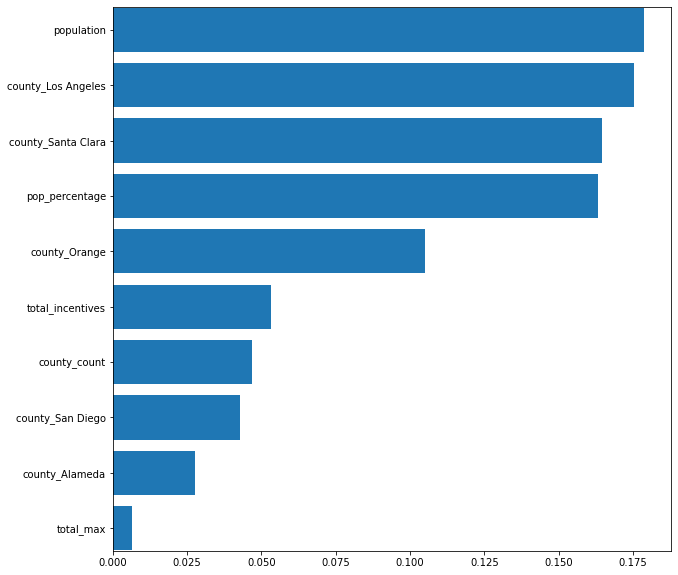

In [106]:
# Use the following code to plot the most important features
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols[-10:], width=width[-10:])

plt.show()